<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [6]:
import pandas as pd

Load the dataset into a dataframe.


In [8]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.loc[:,'ConvertedComp':].head(5)

,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,90000.0,40.0,There is a schedule and/or spec (made by me or...,"Meetings;Non-work commitments (parenting, scho...",All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,"No, but I think we should",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,455352.0,40.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Distrac...,A few days each month,Home,Average,No,NaN,"No, but I think we should",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,65277.0,45.0,There's no schedule or spec; I work on what se...,Distracting work environment;Meetings;Time spe...,A few days each month,"Other place, such as a coworking space or cafe",A little above average,"Yes, because I see value in code review",5.0,"Yes, it's part of our process",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Axes: >

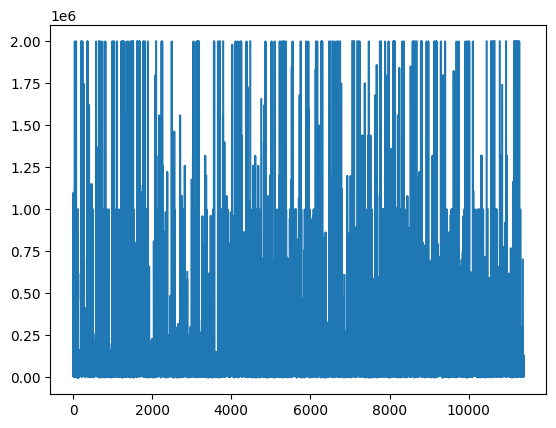

In [11]:
# your code goes here
df['ConvertedComp'].plot.line()

Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

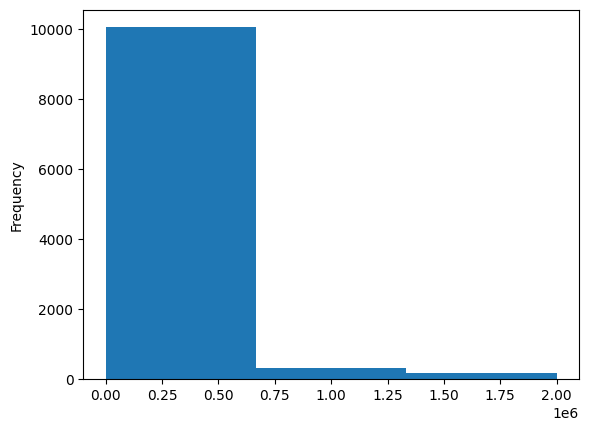

In [14]:
# your code goes here
df['ConvertedComp'].plot.hist(bins=3)

What is the median of the column `ConvertedComp`?


In [15]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [16]:
# your code goes here
df[df['Gender']=='Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [30]:
# your code goes here
df_woman = df[df['Gender']=='Woman']
df_woman['Respondent'].median()

11973.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [32]:
# your code goes here
df[['Age']].head(5)

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

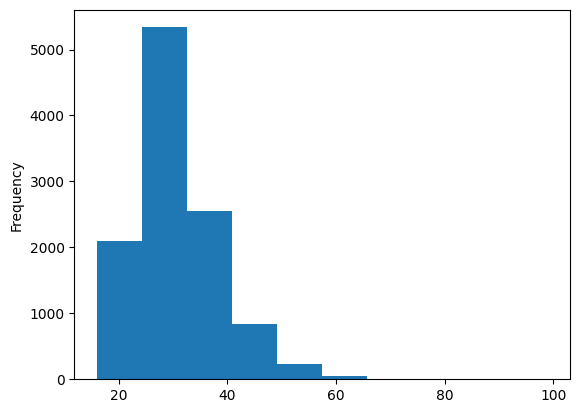

In [33]:
# your code goes here
df['Age'].plot.hist()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: >

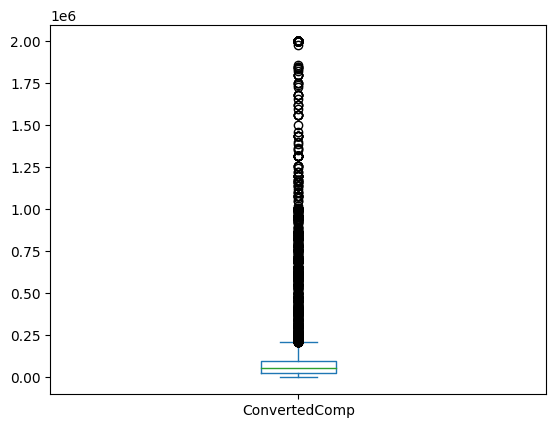

In [35]:
# your code goes here
df.plot.box(column='ConvertedComp')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [42]:
# your code goes here
intQu = df[['ConvertedComp']].describe().loc['75%']  - df[['ConvertedComp']].describe().loc['25%']
intQu

ConvertedComp    73132.0
dtype: float64

Find out the upper and lower bounds.


In [70]:
# your code goes here
min = intQu*1.5 - df[['ConvertedComp']].describe().loc['25%']
max =  intQu*1.5 + df[['ConvertedComp']].describe().loc['75%']
(min, max)

(ConvertedComp    82830.0
 dtype: float64,
 ConvertedComp    209698.0
 dtype: float64)

Identify how many outliers are there in the `ConvertedComp` column.


In [87]:
# your code goes here
aberant = df[df['ConvertedComp'].between(82830.0, 209698.0)]
aberant[['ConvertedComp']].shape[0]

2601

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [94]:
# your code goes here
newData = df[~df['ConvertedComp'].between(82830.0, 209698.0)]
df['ConvertedComp'].shape[0], newData.shape[0]

(11398, 8797)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [97]:
# your code goes here
df[['Age']].corr()

,Age
Age,1.0


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
